In [ ]:
import requests

In [1]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>


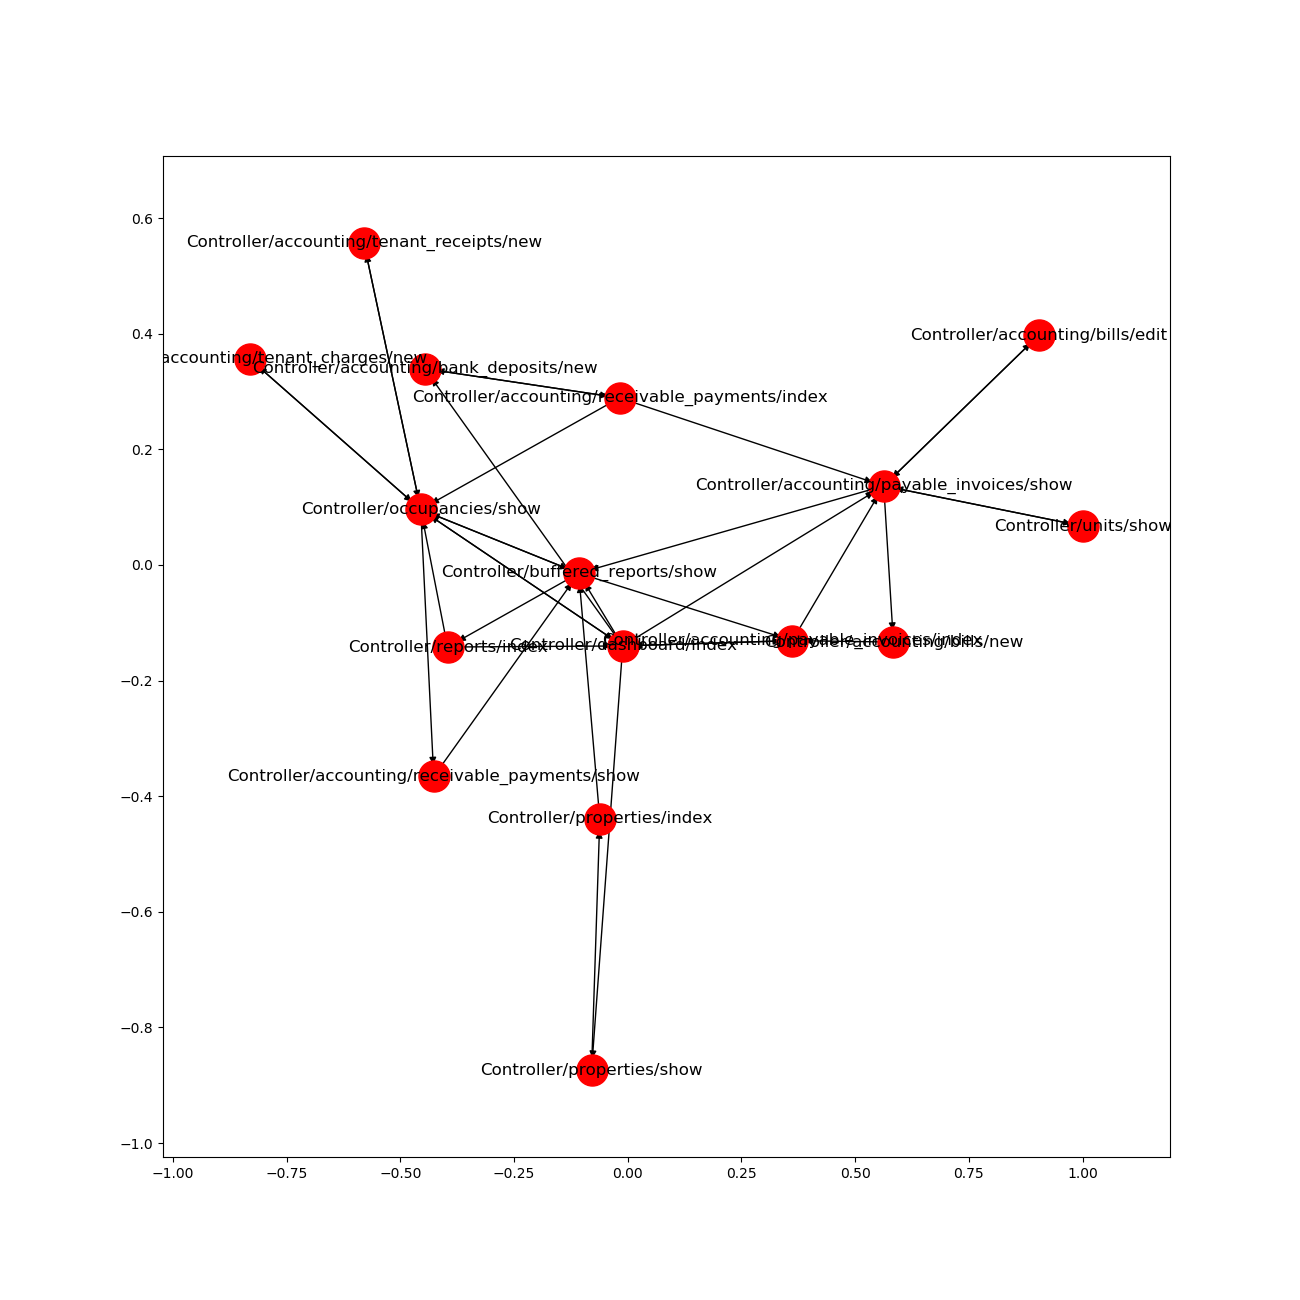

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')


In [2]:
df = pd.read_csv('click.csv')

In [3]:
df.head()

,Timestamp,Account Name,App ID,App Name,Asn,Asn Latitude,Asn Longitude,Asn Organization,Backend Duration,Browser,Browser Transaction Name,City,Connection Setup Duration,Content Type,Country Code,Device Type,Dns Lookup Duration,Dom Processing Duration,Domain,Duration,Layout Name,Name,Network Duration,OS,Page Rendering Duration,Page URL,Queue Duration,Region Code,Responsive Mode,Responsive Support,Secure Handshake Duration,Session,User Agent Name,User Agent OS,User Agent Version,User Agent,User ID,User Login,Using Mobile App,Web App Duration
0,2017-12-22 13:36:29,zohouryproperties,191889,property.live,7922,33.930603,'-84.4613037109375,"Comcast Cable Communications, Inc.",0.005,Chrome,*.appfolio.com:443/accounting/*,Marietta,0.0,text/html,US,Desktop,0.0,0.462,zohouryproperties.appfolio.com,0.502,web_common/main,Controller/accounting/receivable_payments/index,0.005,Windows 10,0.035,https://zohouryproperties.appfolio.com/account...,0.0,GA,1,1,0.0,3cc26cc0873ecc5d,Chrome,Windows,63,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,60,debbie.zpgroup@gmail.com,0,0.000
1,2017-12-20 17:02:09,zohouryproperties,191889,property.live,7018,34.056000,'-84.37950134277344,"AT&T Services, Inc.",0.005,Chrome,*.appfolio.com:443/accounting/*,Roswell,0.0,text/html,US,Desktop,0.0,0.893,zohouryproperties.appfolio.com,0.957,web_common/main,Controller/accounting/receivable_payments/index,0.005,Windows 10,0.059,https://zohouryproperties.appfolio.com/account...,0.0,GA,1,1,0.0,dbb9f87a28fbe2be,Chrome,Windows,63,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,60,debbie.zpgroup@gmail.com,0,0.000
2,2017-12-15 14:58:13,zohouryproperties,191889,property.live,7018,34.056000,'-84.37950134277344,"AT&T Services, Inc.",0.008,Chrome,*.appfolio.com:443/accounting/*,Roswell,0.0,text/html,US,Desktop,0.0,0.567,zohouryproperties.appfolio.com,0.601,web_common/main,Controller/accounting/receivable_payments/index,0.008,Windows 10,0.026,https://zohouryproperties.appfolio.com/account...,0.0,GA,1,1,0.0,884186b4039649a0,Chrome,Windows,63,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,60,debbie.zpgroup@gmail.com,0,0.000
3,2017-12-07 18:04:22,zohouryproperties,191889,property.live,7922,33.930603,'-84.4613037109375,"Comcast Cable Communications, Inc.",0.524,Chrome,*.appfolio.com:443/accounting/*,Marietta,0.0,text/html,US,Desktop,0.0,0.366,zohouryproperties.appfolio.com,1.028,web_common/main,Controller/accounting/payable_invoices/show,0.114,Windows 10,0.138,https://zohouryproperties.appfolio.com/account...,0.0,GA,1,1,0.0,40cd8f81dea9f34d,Chrome,Windows,62,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,60,debbie.zpgroup@gmail.com,0,0.410
4,2017-12-07 18:03:03,zohouryproperties,191889,property.live,7922,33.930603,'-84.4613037109375,"Comcast Cable Communications, Inc.",0.392,Chrome,*.appfolio.com:443/accounting/*,Marietta,0.0,text/html,US,Desktop,0.0,0.312,zohouryproperties.appfolio.com,0.771,web_common/main,Controller/accounting/payable_invoices/show,0.129,Windows 10,0.067,https://zohouryproperties.appfolio.com/account...,0.0,GA,1,1,0.0,40cd8f81dea9f34d,Chrome,Windows,62,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,60,debbie.zpgroup@gmail.com,0,0.263


In [4]:
node = df[['Timestamp', 'Name']]

In [5]:
node['Timestamp'] = pd.to_datetime(node['Timestamp'])

/Users/appfolio/anaconda3/envs/Appfolio/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
tds = pd.Timedelta(' 60 min ')

In [7]:
f = open('click', 'w')

f.write('5\n')
f.write('6')
f.close()
f = open('click', 'r')
f.read()


'5\n6'

In [8]:
f.close()
f = open('click','w')
for i in range(len(node)-1):
    if node['Name'][i] != node['Name'][i+1] and node['Timestamp'][i] - node['Timestamp'][i+1] < tds:
        f.write(node['Name'][i] + ' ' + node['Name'][i+1]+'\n')
f.close()

In [9]:
import networkx as nx

In [10]:
H = nx.DiGraph()
nx.read_edgelist('click.edgelist', create_using = H)


In [21]:
fig.clf()
pos = nx.spring_layout(H)
edge = nx.generate_edgelist(H)
nx.draw_networkx_nodes(H, pos, cmap=plt.get_cmap('jet'), 
                      node_size = 500)
nx.draw_networkx_labels(H, pos)
# nx.draw(H)
# nx.draw_networkx_edges(H, pos, edgelist=edge, edge_color='r', arrows=True)
nx.draw_networkx_edges(H, pos, arrows=True)
fig.show()


In [16]:
len(H.edges())

34

In [17]:
len(H.edges())

34

In [18]:
len(df['Name'])

100

In [19]:
plt.draw()

In [20]:
fig.clf()

In [22]:
nx.write_gexf(H, "test.gexf")

# Extract Data 

## read tenant list 

In [255]:
visitor_list = pd.read_csv('visitorList.csv')


,Visitor ID,Visitor: Last Visit,Number of Days Active,Number of Events
0,desiree.s@apts-ss.com,2018-03-05 15:54:41,30,11228
1,rada3@verizon.net,2018-03-05 19:17:45,30,3092
2,mona@ppmi.services,2018-03-05 17:42:03,30,10788
3,blv.bookkeeping@gmail.com,2018-03-05 12:35:07,30,45350
4,bwilson@jwpropertyserv.com,2018-03-05 19:14:43,30,2459
5,molson@howardhanna.com,2018-03-05 18:40:07,30,13953
6,riopaseo2@sbcglobal.net,2018-03-05 17:45:01,30,19082
7,molly@trilliantnw.com,2018-03-05 19:42:00,30,59614
8,mohlerrgpm@gmail.com,2018-03-05 18:54:08,30,22872
9,barb.toft.bt@gmail.com,2018-03-05 19:54:12,30,41947


In [256]:
visitor_list['Visitor ID'][0]

'desiree.s@apts-ss.com'

# Extract Events

In [334]:
for user in visitor_list['Visitor ID'][:10]:
    userdata = userdata_fetch(user)
    csv_events(userdata, user)

29
29
29
29
29
29
29
29
29
29


In [318]:
ONEDAY   = 86400000
TODAY    = 1520310719000
STARTDAY = 1517891519000

In [321]:
def userdata_fetch(user):
    userdata = []
    i = 0
    global STARTDAY, ONEDAY, TODAY
    endday = STARTDAY
    url = "https://app.pendo.io/api/v1/visitor/"+user+"/history"
    headers = {
        'x-pendo-integration-key': "e87e26c3-9e8f-4e08-5ab1-dc4b91a0de30",
        'content-type': "application/x-www-form-urlencoded"
    }
    # response = requests.get(url, headers = headers, params = params)

    while endday < TODAY:
        endday = STARTDAY + i*ONEDAY
        params = {
            "starttime": str(endday)
        }

        response = requests.get(url, headers = headers, params = params)
        if response.text != '[]':
            userdata.append(response)
    #     a = json.loads(response.text)
    #     if a:
    #         userdata.append(a)
        i += 1
    print(len(userdata))
    return userdata

In [331]:
# dump the selected column data to csv
def csv_events(userdata, user):
    csv_data = pd.DataFrame(columns = ['ts','id','type','duration'])
    for day_data in userdata:
        test_dt = pd.read_json(day_data.text)

        test_dt['id'] = test_dt['pageId'].fillna(test_dt['featureId']) if 'featureId' in test_dt.columns else test_dt['pageId']

        test_dt = test_dt[['ts','id','type','duration']]
        csv_data = csv_data.append(test_dt)
        csv_data.to_csv('data/'+user+'.csv')

In [253]:
csv_data.shape

(11977, 4)

In [254]:
# time(ts), feature/page id, type, duration
csv_data.to_csv('janrue3')